In [1]:
import pandas as pd
import numpy as np
import struct
import codecs
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
from scipy import signal
import h5py

# Enable inline plotting
%matplotlib inline

/home/cahya/.virtualenvs/phase/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
max_length = 100
FEATURES_TINY = "data/phase/ml_features_tiny.csv"
FEATURES = "data/phase/ml_features.csv"
WAVEFORMS_TINY = "data/phase/ml_waveforms_tiny.csv"
WAVEFORMS = "data/phase/ml_waveforms.csv"
STA = "URZ"
phases = ["regP", "regS", "tele"]
channels = ["BHE", "BHZ", "BHN"]

In [367]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)



Python version 3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
Pandas version 0.22.0
Matplotlib version 2.1.2


In [369]:
dff = pd.read_csv(filepath_or_buffer=FEATURES)
dff.head()

/home/cahya/.virtualenvs/phase/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,1582602,LPAZ,9.482724e+08,Lg,regS,Lg,regS,0.000000,A,0.666667,...,1.815760,0.281515,4.312000,0.0,-0.360000,0.672331,2.462823,1.196801,1.564852,0.810008
1,3392748,LPAZ,9.660487e+08,Sn,regS,Lg,regS,2.250001,A,0.333333,...,3.318087,5.777322,3.312782,0.0,0.000000,0.771338,0.658481,2.513435,3.555231,1.341278
2,4251736,LPAZ,9.755992e+08,Lg,regS,Lg,regS,0.549998,A,0.289855,...,5.006600,3.991400,1.593971,-0.1,-0.215000,1.842368,6.353942,0.422784,1.290310,1.712811
3,5843204,LPAZ,9.915611e+08,Lg,regS,Sn,regS,2.170612,A,0.571429,...,2.034370,4.254982,4.254982,0.0,0.000000,1.255465,2.631712,1.016241,2.840468,9.503727
4,6033158,LPAZ,9.934632e+08,Sn,regS,Sn,regS,2.549999,A,0.166667,...,1.822586,1.937456,4.009178,-0.3,-0.453333,0.410712,1.057677,0.842994,1.624028,1.184967


In [370]:
# dfw = pd.read_csv(filepath_or_buffer=WAVEFORMS_TINY)
dfw = pd.read_csv(filepath_or_buffer=WAVEFORMS)
# dfw.dropna(thresh=10)
dfw.head()

/home/cahya/.virtualenvs/phase/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,WAVEFORMID,ARID,STA,CHAN,SAMPRATE,STARTTIME,ENDTIME,NSAMP,CALIB,SAMPLES
0,2205,6120104,LPAZ,BHN,0.0,9.938702e+08,9.938702e+08,0.0,0.0,NaN
1,2206,6135367,LPAZ,BHE,0.0,9.942730e+08,9.942731e+08,0.0,0.0,NaN
2,2207,6135367,LPAZ,BHZ,0.0,9.942730e+08,9.942731e+08,0.0,0.0,NaN
3,2208,6135367,LPAZ,BHN,0.0,9.942730e+08,9.942731e+08,0.0,0.0,NaN
4,2209,6161001,LPAZ,BHE,0.0,9.942963e+08,9.942963e+08,0.0,0.0,NaN


In [371]:
dfwt = pd.read_csv(filepath_or_buffer=WAVEFORMS_TINY)
dfwt.head()

,WAVEFORMID,ARID,STA,CHAN,SAMPRATE,STARTTIME,ENDTIME,NSAMP,CALIB,SAMPLES
0,1251350,13510282,URZ,BHZ,40,1.058701e+09,1.058701e+09,400,0.0372,e336b841a470c1412a3aaa410c938b41857c5441b51523...
1,1251351,13510282,URZ,BHN,40,1.058701e+09,1.058701e+09,400,0.0372,96e19ec38e069ec379189dc3afd49bc332d799c3a62a98...
2,1220995,14754673,URZ,BHE,40,1.068339e+09,1.068339e+09,400,0.0379,4f40e8c2d4abe0c2aac0eac2a61bf7c20dd1f0c2cb30cd...
3,1220996,14754673,URZ,BHZ,40,1.068339e+09,1.068339e+09,400,0.0372,a01a0ec2d50990c1e02db0c144fa23c2ce884ec288855c...
4,1221366,16048768,URZ,BHN,40,1.077887e+09,1.077887e+09,400,0.0372,750281c2b30c78c29d8071c258a86ac207f066c23e7962...


In [372]:
sample=dfw[dfw.WAVEFORMID==1687]["SAMPLES"]
print(len(sample.values[0]))

3200


In [373]:
dff[dff.ARID==13510282]["CLASS_PHASE"].values[0]

'regS'

In [374]:
dfw[dfw.ARID==125801379]

,WAVEFORMID,ARID,STA,CHAN,SAMPRATE,STARTTIME,ENDTIME,NSAMP,CALIB,SAMPLES
79165,1687,125801379,LPAZ,BHE,40.0,1.503905e+09,1.503905e+09,400.0,0.02067,376c8044550a7444f73c644422935c44bc6f4e446ece2c...
79172,1688,125801379,LPAZ,BHZ,40.0,1.503905e+09,1.503905e+09,400.0,0.02062,bba1bcc3e758f8c3814b23c4d8fc3fc4ecdb43c4e7e837...
79173,1689,125801379,LPAZ,BHN,40.0,1.503905e+09,1.503905e+09,400.0,0.02057,3c2b6ac3b168a7c3a74fe2c3e9dc0ac451e018c4d9a91b...


In [375]:
dff[dff.ARID==28541585]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
428671,28541585,URZ,1.143123e+09,P,tele,P,tele,0.55,A,0.666667,...,1.702892,0.042081,0.042081,0.0,0.0,0.467387,0.594238,0.057473,0.053682,0.463873


In [376]:
dfw.dtypes

WAVEFORMID      int64
ARID            int64
STA            object
CHAN           object
SAMPRATE      float64
STARTTIME     float64
ENDTIME       float64
NSAMP         float64
CALIB         float64
SAMPLES        object
dtype: object

In [377]:
# arid = list(dfw.groupby(["ARID"])["ARID"])
# print(arid[0])

In [378]:
def get_arrival_waveforms(dfw, arid, chan=None):
    #returns waveforms for all three channels for a given arrival

    rows = (dfw.ARID == arid)
    if chan:
        rows = rows & (dfw.CHAN == chan)
    data = dfw[rows].values

    print('Arid:{}, chan:{}, fetched {} waveforms'.format(arid, chan, len(data)))
    # print(data)

    ret = []

    for dat in data:
        #print("dat:{}".format(dat))
        dat = list(dat)
        nsamp = int(dat[7])
        if nsamp==0:
            continue
        #print("nsamp:{}, len:{}".format(nsamp, len(dat[9])))
        waveform = np.array(struct.unpack('%sf' % nsamp, codecs.decode(dat[9], 'hex_codec')))
        dat[9] = waveform
        # print(dat)
        ret.append(dat)

    return ret

In [379]:
def test_data(dfw, arid, chan=None):
    rows = (dfw.ARID == arid)
    rows = rows & (dfw.CHAN == chan)
    data = dfw[rows].values
    # print("rows:{}".format(rows))
    print("len of data:{}".format(len(data)))

test_data(dfw, 125801379, "BHZ")

len of data:1


In [380]:
def test_extraction(dff, dfw, arid):
    """just a test..."""
    data = get_arrival_waveforms(dfw, arid, chan=None)

    nchan = len(data)
    fig = plt.figure()
    for fi, dat in enumerate(data):
        ax = fig.add_subplot(nchan, 1, fi + 1)
        ax.plot(dat[9])
        ax.set_ylabel('%s %s' % (dat[2], dat[3]))
        if fi==0:
            phase = dff[dff.ARID==arid]["CLASS_PHASE"].values[0]
            ax.set_title('ARID: %d, phase: %s, arrival: (time %3.3f-%3.3f)' % (dat[1], phase, dat[5],dat[6]))
    plt.show()

In [381]:
x=dfw[(dfw.ARID==125801379)&(dfw.CHAN=="BHE")].SAMPLES.values[0]
y=dfwt[(dfwt.ARID==125801379)&(dfw.CHAN=="BHE")].SAMPLES.values[0]

/home/cahya/.virtualenvs/phase/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Arid:125801379, chan:None, fetched 3 waveforms


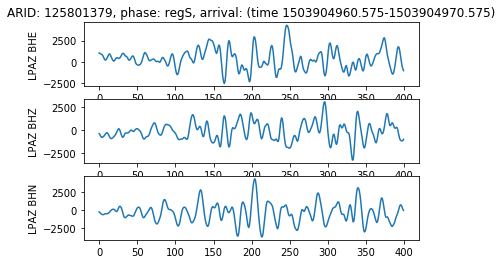

In [382]:
test_extraction(dff, dfw, 125801379)

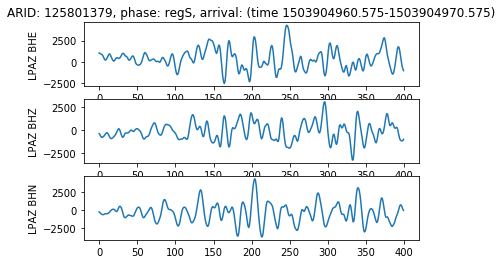

In [17]:
test_extraction(dff, dfwt, 125801379)

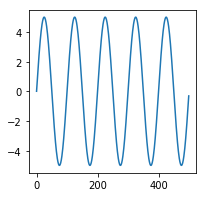

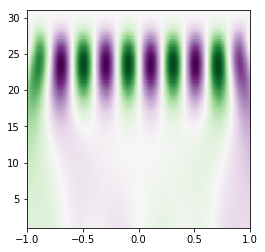

In [460]:
def spect_sample1():
    fs = 1.0
    t_length = 5.0
    sample_persec = 100.0
    N = int(t_length*sample_persec)
    amp = 5
    carrier=[]
    for i in range(N):
        t = i/sample_persec
        carrier.append(amp * np.sin(2*np.pi*fs*t) + 
                       0*amp * np.sin(2*np.pi*2*fs*t) +
                      0*amp * np.sin(2*np.pi*3*fs*t))
    x = np.array(carrier)
    
    plt.figure(1, figsize=(3, 3))
    plt.plot(x)
    plt.savefig("waveform1.png")    
    plt.show()
    """
    
    f, t, Sxx = signal.spectrogram(x, sample_persec, nperseg=100, noverlap=90)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    """
    plt.figure(2, figsize=(4, 4))
    widths = np.arange(1, 100)
    cwtmatr = signal.cwt(x, signal.ricker, widths)
    #print(cwtmatr[0])
    plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.savefig("wavelet1.png")
    plt.show()
    
spect_sample1()

[[ -0.81881232  -0.81880568  -0.24474027 ...   1.58652739  16.01322818
   41.57744973]
 [ -2.42565278  -2.42563454  -1.86834526 ...  43.84216821  55.81585445
   41.99317355]
 [ -4.48487968  -4.48485438  -4.00470339 ...  68.49225597  61.62716572
   38.5755749 ]
 ...
 [ 53.20717132  56.48782358  59.87288129 ... 191.78371558 187.87433235
  183.85127379]
 [ 53.15429794  56.42403066  59.79742063 ... 190.9375946  187.0684256
  183.0866568 ]
 [ 53.09250941  56.35116369  59.71274286 ... 190.09288111 186.26269741
  182.32095765]]
273.276103935808 -273.276103935808


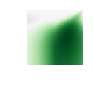

In [364]:
def wv_test():
    x = np.arange(72)
    widths = np.arange(1, 72)
    cwtmatr = signal.cwt(x, signal.ricker, widths)
    vmax=abs(cwtmatr).max()
    vmin=-abs(cwtmatr).max()
    print(cwtmatr)
    print(vmax, vmin)
    plt.figure(1, figsize=(1,1))
    plt.axis('off')
    plt.imshow(cwtmatr, extent=[-1, 1, 1, 72], cmap='PRGn', aspect='auto',
           vmax=vmax, vmin=vmin)
    plt.savefig("wavelet2.png", bbox_inches='tight')

wv_test()

In [440]:
def printname(name):
    print("Name", name)
    
def h5_write():
    with h5py.File("mytestfile.hdf5", "w") as f:
        dset = f.create_dataset("mydataset", (100,), dtype='i')
        print("<", dset.name, "|", f.name, ">")
        grp = f.create_group("subgroup")
        dset2 = grp.create_dataset("another_dataset", (50,), dtype='f')
        print("dset2:",dset2.name)
        for name in f:
            print("f:",name)
        print("dset: ", dset)
        dset = [1,2,3,4,5]
        # print(dset)
        arr = np.arange(100)
        f.create_dataset("init", data=arr)

    
def h5_read():
    with h5py.File("mytestfile.hdf5", "r") as f:
        #f.visit(printname)
        dset = f['mydataset']
        print("dset:", dset)
        print("dset:", dset[5])
        k = f.keys()
        print("keys:", k)

In [441]:

h5_write()

< /mydataset | / >
dset2: /subgroup/another_dataset
f: mydataset
f: subgroup
dset:  <HDF5 dataset "mydataset": shape (100,), type "<i4">


In [442]:

h5_read()


dset: <HDF5 dataset "mydataset": shape (100,), type "<i4">
dset: 0
keys: KeysView(<HDF5 file "mytestfile.hdf5" (mode r)>)


In [303]:
def spect_show(dff, dfw, arid, chan=None):
    sample_rate=40

    data = get_arrival_waveforms(dfw, arid, chan)[0][9]    
    plt.plot(data)
    plt.show()
    
    f, t, Sxx = signal.spectrogram(data, sample_rate, nperseg=10, noverlap=9)
    #print(f,t,Sxx)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()


In [263]:
def wavelet_show(dff, dfw, arid, chan=None):
    sample_rate=40
    
    data = get_arrival_waveforms(dfw, arid, chan)
    if len(data) != 0:
        data = data[0][9]
    else:
        return False
    phase = dff[dff.ARID==arid]["CLASS_PHASE"].values[0]
    print("phase: {}".format(phase))  
    plt.plot(data)
    plt.show()
    
    widths = np.arange(1, 31)
    cwtmatr = signal.cwt(data, signal.ricker, widths)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.show()
    return True

In [ ]:
def graph_show(dff, dfw, arid, chan=None):
    sample_rate=40

    data = get_arrival_waveforms(dfw, arid, chan)[0][9]    
    plt.plot(data)
    plt.show()

    f, t, Sxx = signal.spectrogram(data, sample_rate, nperseg=10, noverlap=9)
    plt.pcolormesh(t, f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    widths = np.arange(1, 31)
    cwtmatr = signal.cwt(data, signal.ricker, widths)
    plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

    plt.show()

Arid:125801379, chan:BHN, fetched 1 waveforms
phase: regS


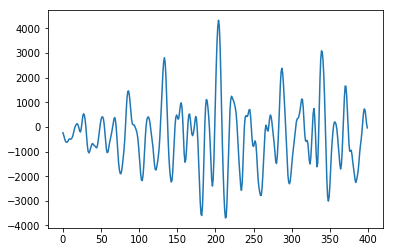

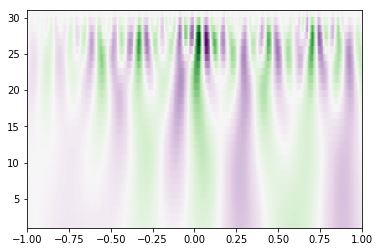

Arid:125801379, chan:BHE, fetched 1 waveforms
phase: regS


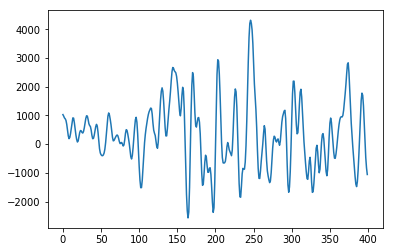

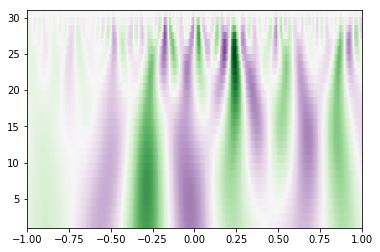

Arid:125801379, chan:BHZ, fetched 1 waveforms
phase: regS


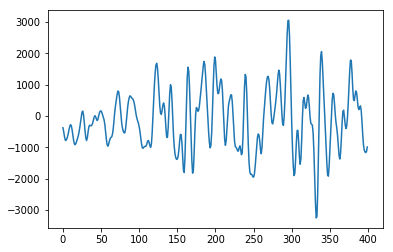

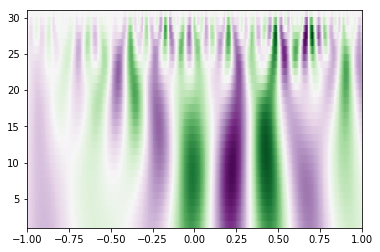

Arid:67108874, chan:BHN, fetched 1 waveforms
phase: N


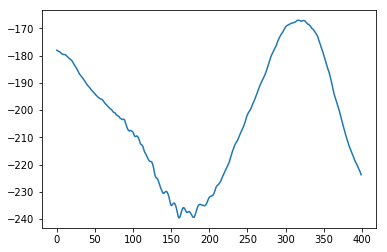

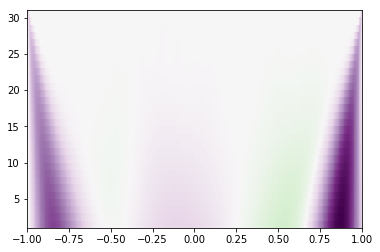

Arid:67108874, chan:BHE, fetched 1 waveforms
phase: N


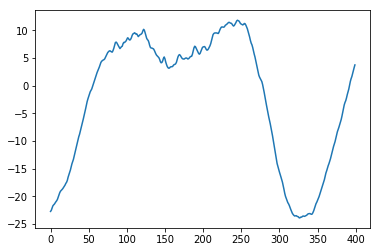

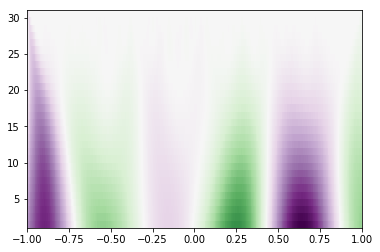

Arid:67108874, chan:BHZ, fetched 1 waveforms
phase: N


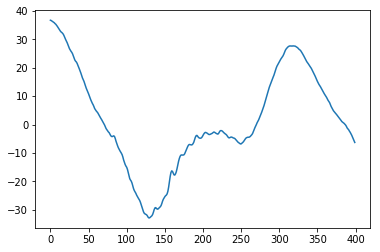

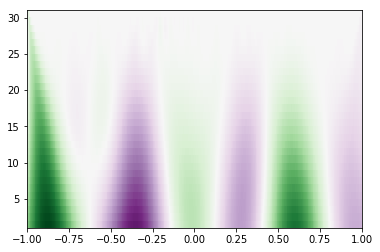

Arid:31457313, chan:None, fetched 3 waveforms
phase: N


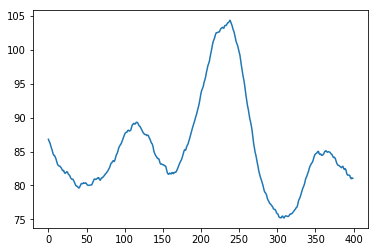

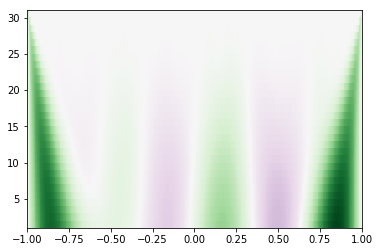

Arid:65011750, chan:BHZ, fetched 1 waveforms
phase: regP


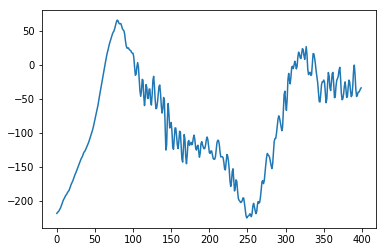

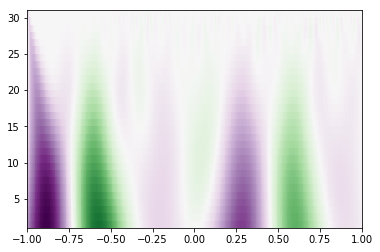

True

In [264]:
wavelet_show(dff, dfw, 125801379, chan="BHN")
wavelet_show(dff, dfw, 125801379, chan="BHE")
wavelet_show(dff, dfw, 125801379, chan="BHZ")
#spect_show(dfw, 67108873)
wavelet_show(dff, dfw, 67108874, chan="BHN")
wavelet_show(dff, dfw, 67108874, chan="BHE")
wavelet_show(dff, dfw, 67108874, chan="BHZ")
wavelet_show(dff, dfw, 31457313)
wavelet_show(dff, dfw, 65011750, chan="BHZ")

Arid:67108873, fetched 3 waveforms


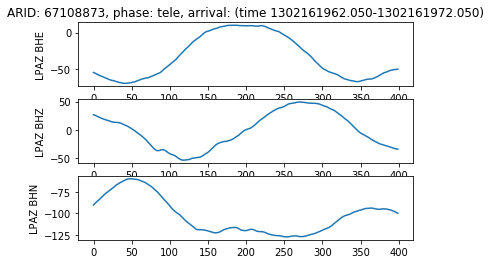

Arid:67108874, fetched 3 waveforms


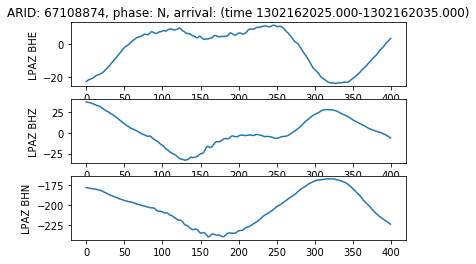

Arid:115343379, fetched 3 waveforms


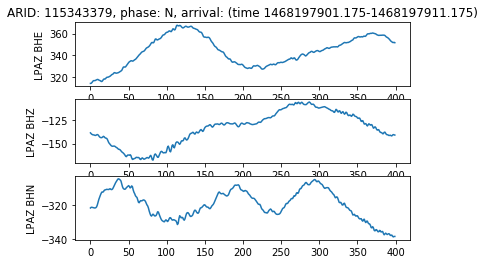

Arid:31457313, fetched 3 waveforms


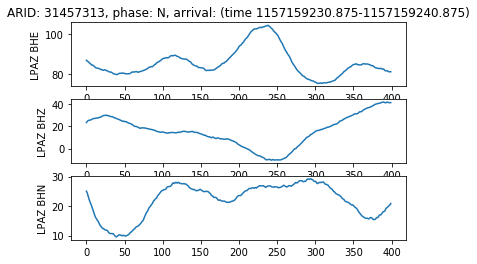

Arid:65011750, fetched 3 waveforms


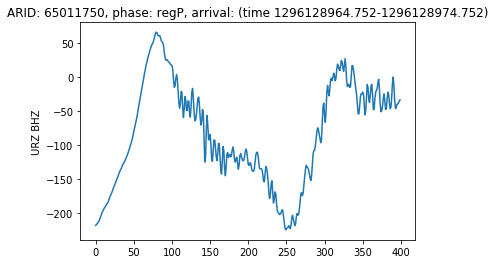

Arid:65011753, fetched 3 waveforms


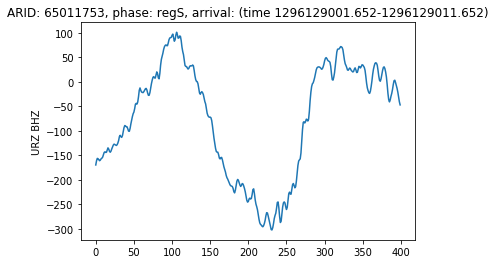

Arid:73400362, fetched 3 waveforms


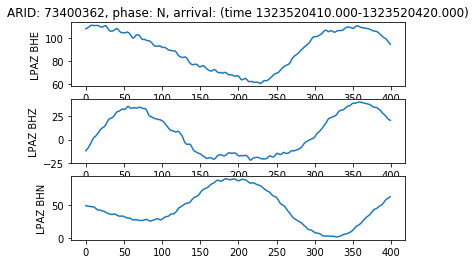

Arid:73400363, fetched 3 waveforms


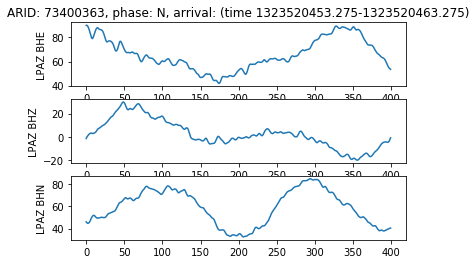

Arid:14680120, fetched 3 waveforms


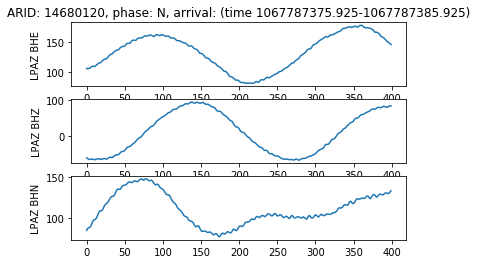

Arid:127926339, fetched 3 waveforms


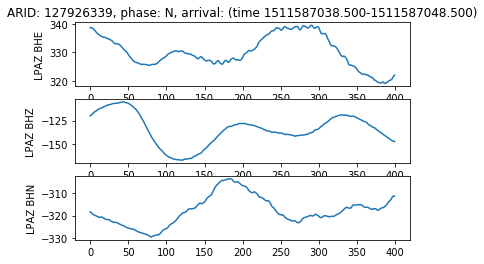

Arid:113246295, fetched 3 waveforms


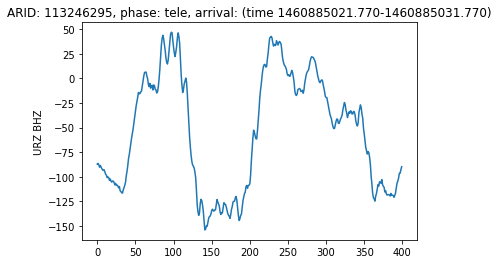

Arid:29360218, fetched 3 waveforms


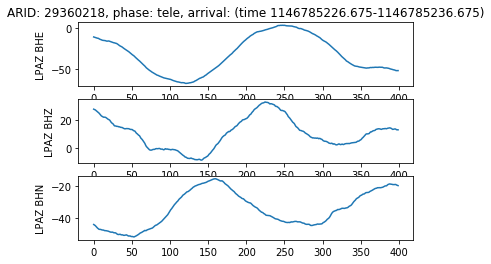

Arid:85983371, fetched 3 waveforms


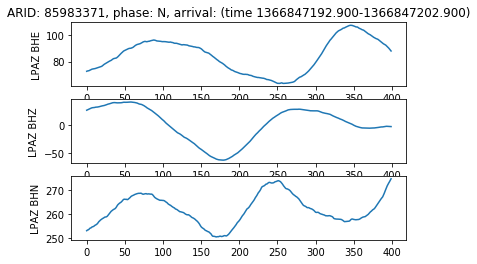

Arid:50331788, fetched 3 waveforms


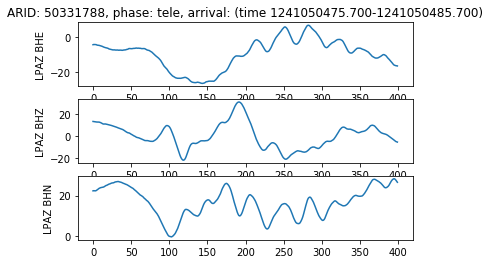

Arid:94371985, fetched 3 waveforms


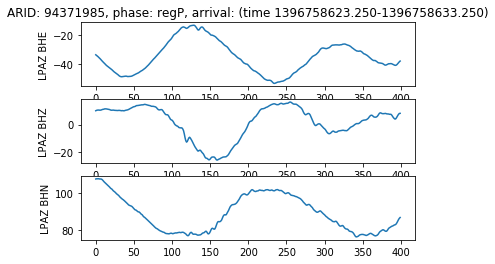

Arid:94371989, fetched 3 waveforms


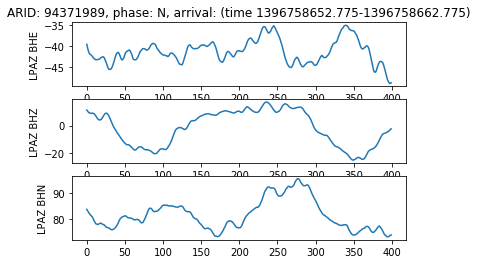

Arid:94371990, fetched 3 waveforms


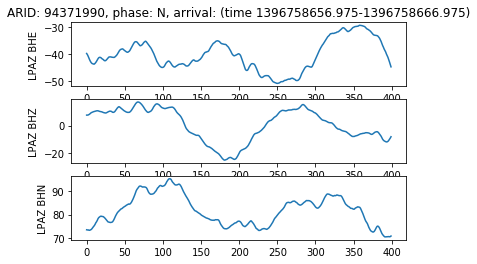

Arid:20971685, fetched 3 waveforms


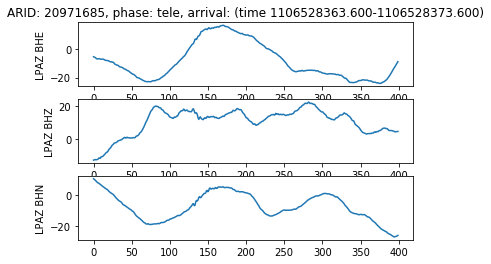

Arid:37748917, fetched 3 waveforms


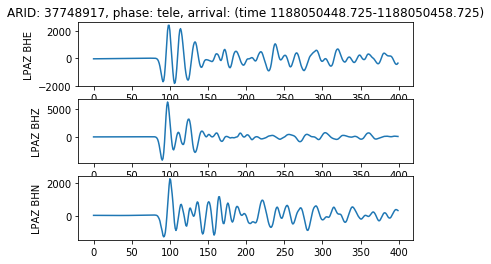

Arid:123732153, fetched 3 waveforms


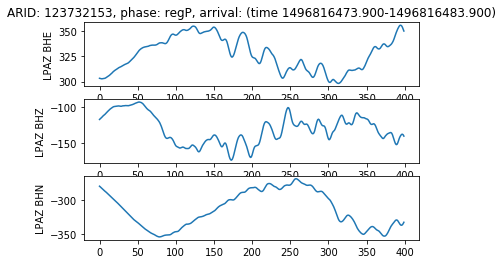

Arid:65011905, fetched 3 waveforms


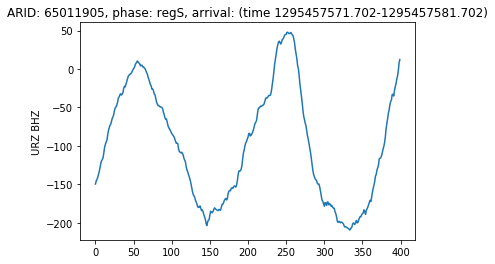

Arid:18874577, fetched 3 waveforms


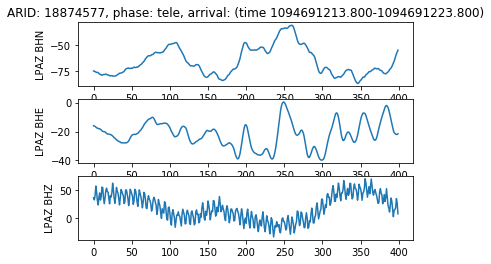

Arid:65011925, fetched 3 waveforms


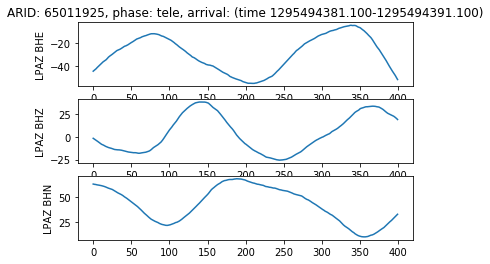

Arid:83886298, fetched 3 waveforms


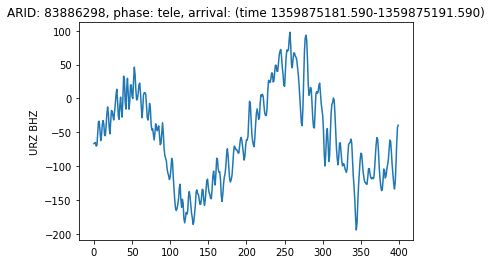

Arid:52429073, fetched 3 waveforms


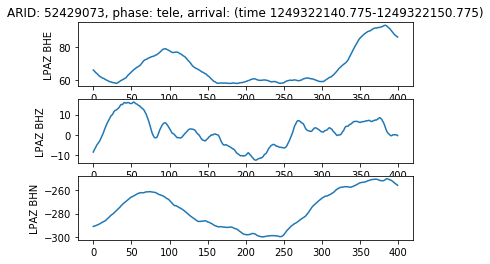

Arid:67109206, fetched 3 waveforms


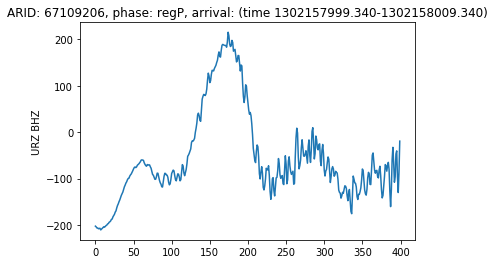

Arid:67109211, fetched 3 waveforms


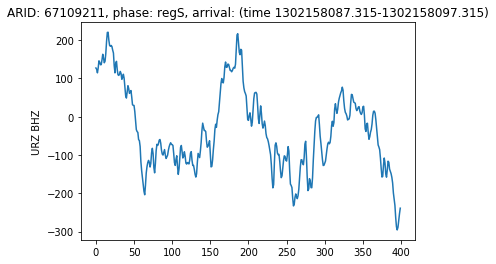

Arid:71303524, fetched 3 waveforms


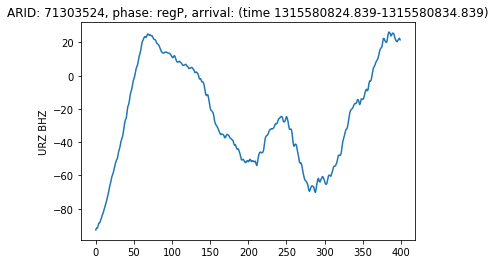

Arid:67109251, fetched 3 waveforms


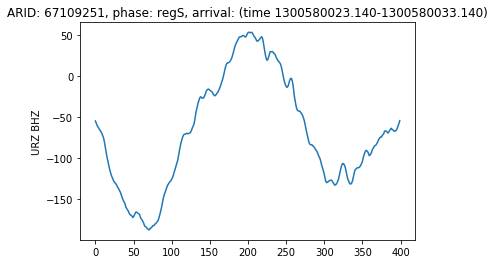

Arid:67109253, fetched 3 waveforms


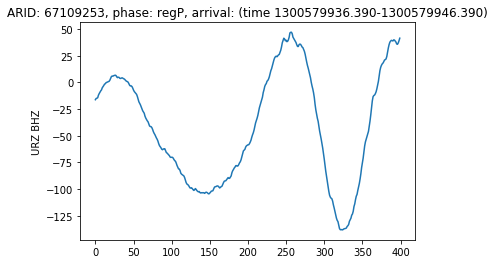

In [124]:
# test_extraction(df, 14754673)
# test_extraction(df, 16206751)
# for arid in [28541585,15029724,14992929,14972252,28556291,28557837,28559193,13097443,13097727,13097728,13097729,13097946]:
phase_counter = {}
counter = 0
# for arid in sorted(list(set(dfw.ARID))):
for arid in list(set(dfw.ARID)):
    if counter >= 30:
        break
    # print("arid:{}".format(arid))
    dff_current = dff[(dff.ARID==arid)]
    dfw_current = dfw[(dfw.ARID==arid) & (dfw.SAMPRATE>0)]
    if len(dff_current) > 0 and len(dfw_current) >0:
        phase = dff[dff.ARID==arid]["CLASS_PHASE"].values[0]
        if phase not in phase_counter:
            phase_counter[phase] = 1
        else:
            phase_counter[phase] += 1
        # print("{}:{}".format(arid, phase))
        if phase_counter[phase] <= 10:
            counter += 1
            test_extraction(dff, dfw, arid)

counter:0
counter:0
counter:0
counter:0
Arid:67108873, chan:BHN, fetched 1 waveforms
phase: tele


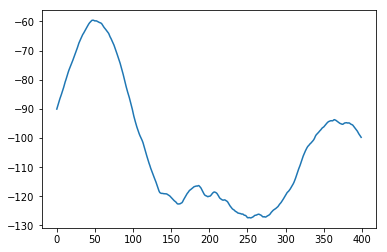

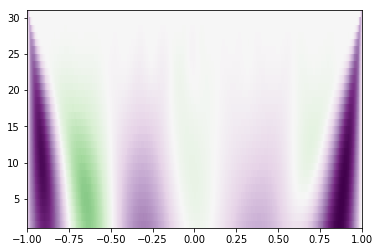

counter:1
Arid:67108874, chan:BHN, fetched 1 waveforms
phase: N


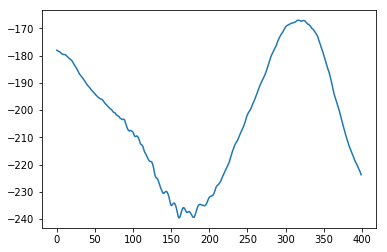

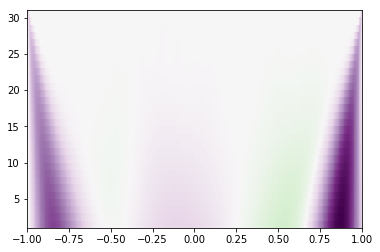

counter:2
Arid:115343379, chan:BHN, fetched 1 waveforms
phase: N


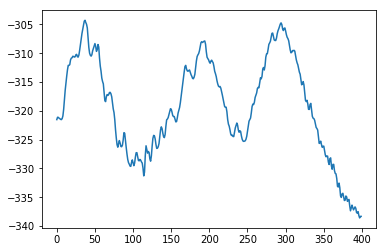

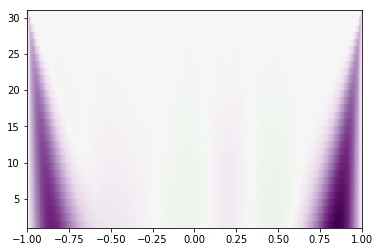

counter:3
counter:3
counter:3
Arid:31457313, chan:BHN, fetched 1 waveforms
phase: N


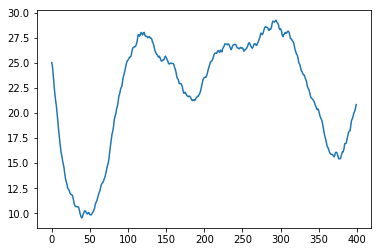

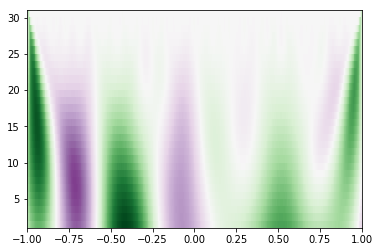

counter:4
Arid:65011750, chan:BHN, fetched 1 waveforms
counter:5
counter:5
Arid:65011753, chan:BHN, fetched 1 waveforms
counter:6
Arid:73400362, chan:BHN, fetched 1 waveforms
phase: N


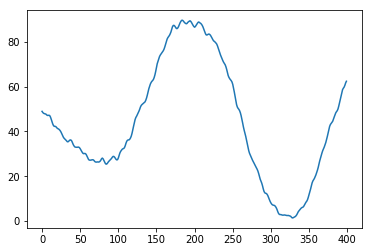

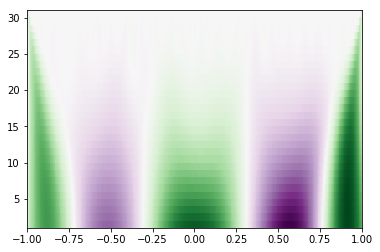

counter:7
Arid:73400363, chan:BHN, fetched 1 waveforms
phase: N


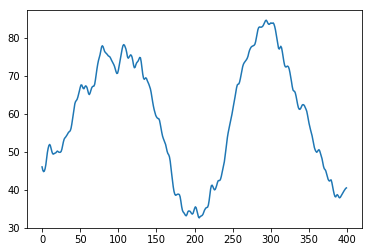

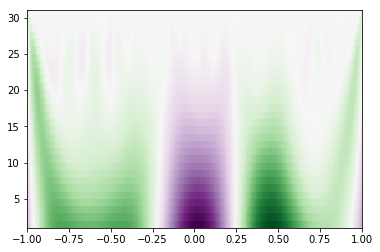

counter:8
counter:8
counter:8
counter:8
counter:8
counter:8
counter:8
counter:8
Arid:14680120, chan:BHN, fetched 1 waveforms
phase: N


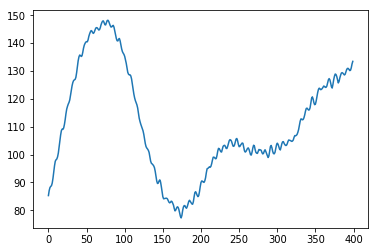

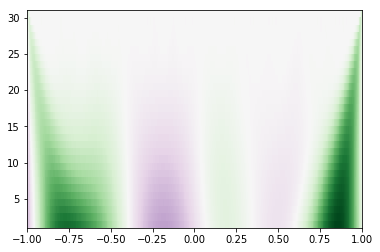

counter:9
counter:9
counter:9
Arid:127926339, chan:BHN, fetched 1 waveforms
phase: N


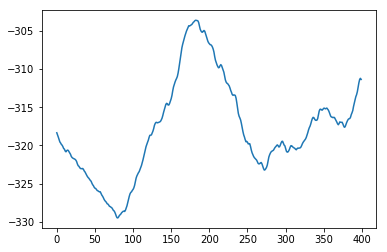

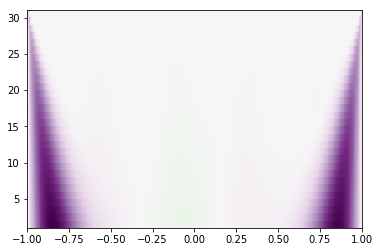

counter:10
counter:10
counter:10
counter:10
counter:10
counter:10
Arid:113246295, chan:BHN, fetched 1 waveforms
counter:11
Arid:29360218, chan:BHN, fetched 1 waveforms
phase: tele


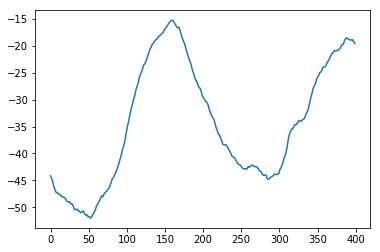

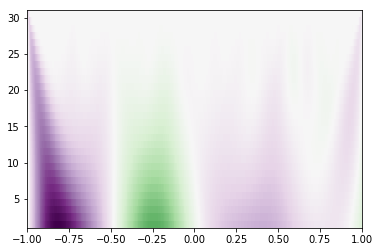

counter:12
counter:12
counter:12
counter:12
Arid:85983371, chan:BHN, fetched 1 waveforms
phase: N


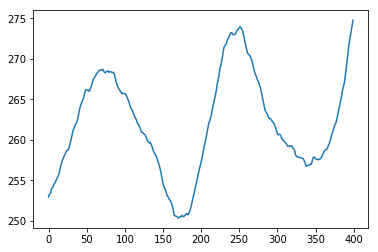

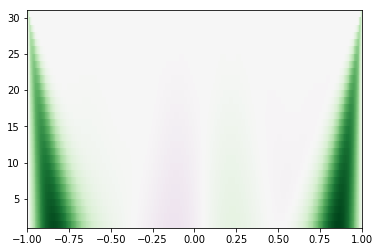

counter:13
Arid:50331788, chan:BHN, fetched 1 waveforms
phase: tele


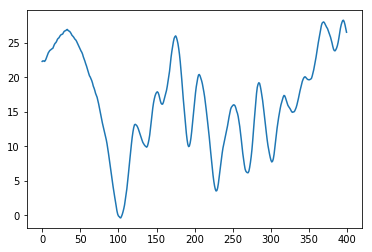

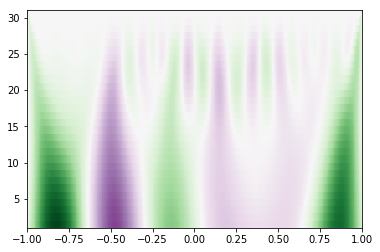

counter:14
Arid:94371985, chan:BHN, fetched 1 waveforms
phase: regP


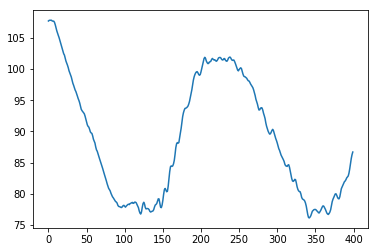

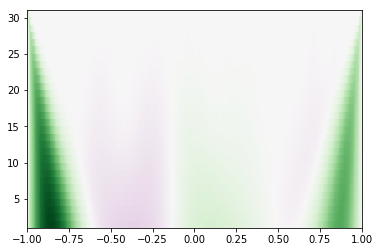

counter:15
Arid:94371989, chan:BHN, fetched 1 waveforms
phase: N


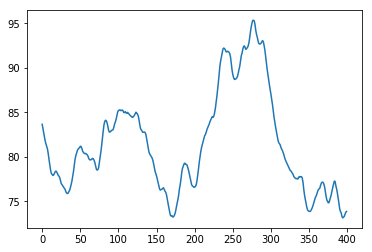

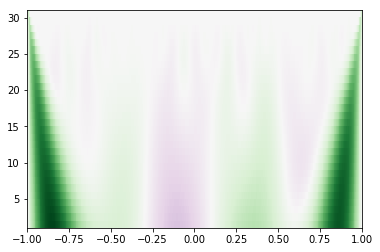

counter:16
Arid:94371990, chan:BHN, fetched 1 waveforms
phase: N


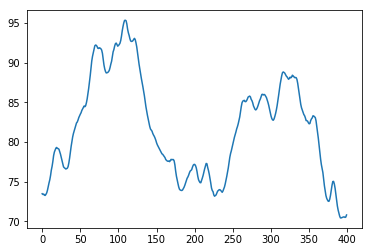

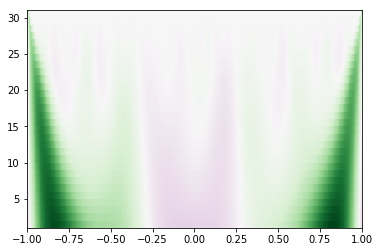

counter:17
counter:17
counter:17
counter:17
counter:17
counter:17
counter:17
counter:17
counter:17
counter:17
counter:17
counter:17
Arid:20971685, chan:BHN, fetched 1 waveforms
phase: tele


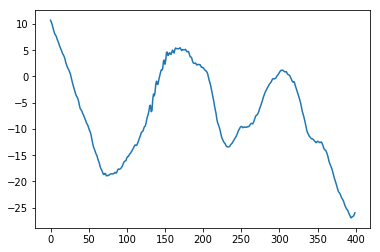

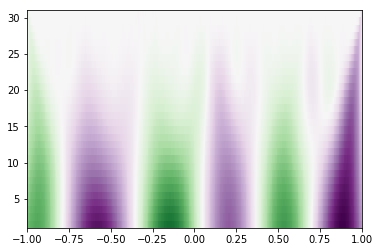

counter:18
counter:18
counter:18
Arid:37748917, chan:BHN, fetched 1 waveforms
phase: tele


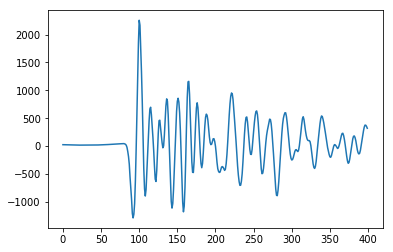

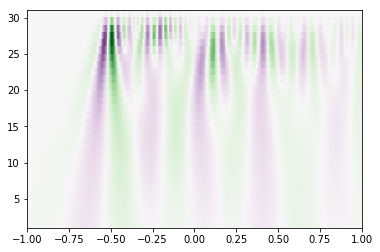

counter:19
counter:19
counter:19
counter:19
Arid:123732153, chan:BHN, fetched 1 waveforms
phase: regP


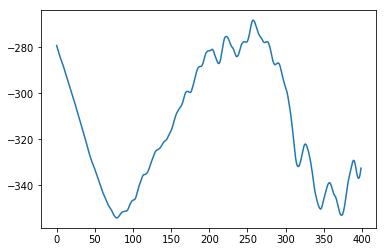

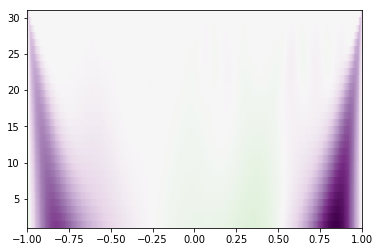

counter:20
counter:20
counter:20
counter:20
counter:20
counter:20
Arid:65011905, chan:BHN, fetched 1 waveforms
counter:21
counter:21
counter:21
counter:21
Arid:18874577, chan:BHN, fetched 1 waveforms
phase: tele


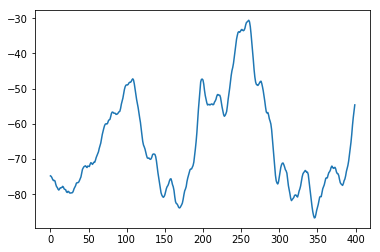

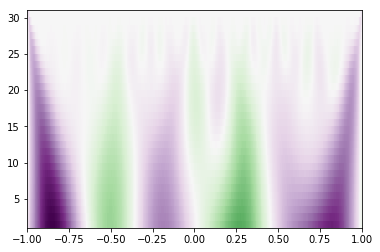

counter:22
counter:22
counter:22
Arid:65011925, chan:BHN, fetched 1 waveforms
phase: tele


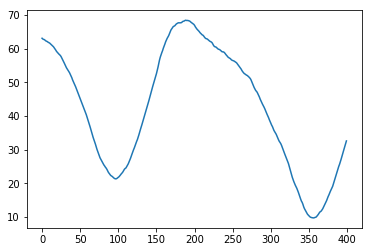

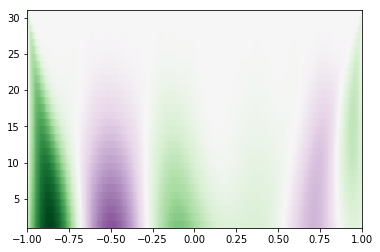

counter:23
counter:23
counter:23
counter:23
counter:23
counter:23
counter:23
counter:23
Arid:83886298, chan:BHN, fetched 1 waveforms
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
counter:24
Arid:52429073, chan:BHN, fetched 1 waveforms
phase: tele


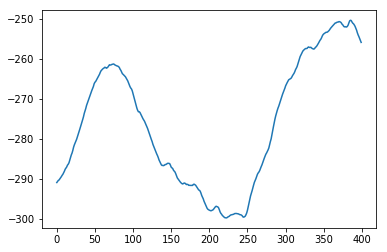

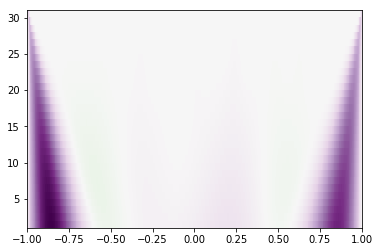

counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
counter:25
Arid:67109206, chan:BHN, fetched 1 waveforms
counter:26
counter:26
counter:26
counter:26
counter:26
Arid:67109211, chan:BHN, fetched 1 waveforms
counter:27
counter:27
counter:27
counter:27
counter:27
counter:27
Arid:71303524, chan:BHN, fetched 1 waveforms
counter:28
counter:28
counter:28
counter:28
counter:28
counter:28
counter:28
counter:28
counter:28
counter:28
Arid:67109251, chan:BHN, fetched 1 waveforms
counter:29
Arid:67109253, chan:BHN, fetched 1 waveforms
counter:30


In [247]:
phase_counter = {}
counter = 0
# for arid in sorted(list(set(dfw.ARID))):
for arid in list(set(dfw.ARID)):
    print("counter:{}".format(counter))
    if counter >= 30:
        break
    # print("arid:{}".format(arid))
    dff_current = dff[(dff.ARID==arid)]
    dfw_current = dfw[(dfw.ARID==arid) & (dfw.SAMPRATE>0)]
    if len(dff_current) > 0 and len(dfw_current) >0:
        phase = dff[dff.ARID==arid]["CLASS_PHASE"].values[0]
        if phase not in phase_counter:
            phase_counter[phase] = 1
        else:
            phase_counter[phase] += 1
        # print("{}:{}".format(arid, phase))
        if phase_counter[phase] <= 10:
            w = wavelet_show(dff, dfw, arid, chan="BHN")
            counter += 1                

In [121]:
x = dfw[dfw.ARID==65011750]

#x = dfw[dfw.ARID==125801379]
print(len(x))
print(x)


3
         WAVEFORMID      ARID  STA CHAN  SAMPRATE     STARTTIME       ENDTIME  \
1582555     1263750  65011750  URZ  BHN       0.0  1.296129e+09  1.296129e+09   
2282258     1263748  65011750  URZ  BHE       0.0  1.296129e+09  1.296129e+09   
2308509     1263749  65011750  URZ  BHZ      40.0  1.296129e+09  1.296129e+09   

         NSAMP   CALIB                                            SAMPLES  
1582555    0.0  0.0000                                                NaN  
2282258    0.0  0.0000                                                NaN  
2308509  400.0  0.0372  7a075ac3b0c358c309b957c3f80256c3aced53c347b251...  


In [86]:
sorted(list(set(df.ARID)))[:2]

[13190127, 13209625]

In [16]:
dff[(dff.STA == "URZ") & (dff.CLASS_PHASE == "regP")][1000:1010]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
418432,69639712,URZ,1.310148e+09,Pn,regP,Pn,regP,0.32500,A,0.166667,...,1.526034,0.049635,0.075242,0.0,0.000000,0.592929,0.550145,0.449538,1.236630,0.119959
418433,69651250,URZ,1.310189e+09,Pn,regP,Pn,regP,3.44999,A,0.166667,...,1.102226,0.058988,0.064236,0.3,0.336667,2.021497,0.469324,0.688354,0.350253,0.071304
418434,69654399,URZ,1.310200e+09,Pn,regP,Pn,regP,0.00000,A,0.166667,...,1.545706,0.060855,0.063311,0.1,0.190000,0.960809,0.241442,0.281890,0.484942,0.170457
418435,69659741,URZ,1.310216e+09,Pn,regP,Pn,regP,2.07500,A,0.166667,...,2.313854,0.087496,0.087496,0.2,0.205000,0.476854,1.159328,0.493377,0.134886,0.179387
418436,69662881,URZ,1.310222e+09,Pn,regP,Pn,regP,0.00000,A,0.444444,...,2.817011,0.098782,0.099715,0.3,0.363333,0.550186,0.128019,0.359782,0.202776,0.116407
418437,79343290,URZ,1.343906e+09,Pn,regP,Pn,regP,1.00000,A,0.333333,...,3.316736,0.115084,0.282349,0.1,0.470000,0.837231,0.264252,0.298259,0.707707,0.087427
418438,79343890,URZ,1.343908e+09,Pn,regP,Pn,regP,0.00000,A,0.166667,...,1.688473,0.084972,0.084972,0.1,0.290000,1.748699,0.655791,0.263853,0.189875,0.040574
418439,79343892,URZ,1.343908e+09,Pn,regP,Pn,regP,0.00000,A,0.166667,...,2.427071,0.037418,0.070576,0.1,0.290000,2.128624,0.278531,1.129007,0.230905,0.059788
418440,79344790,URZ,1.343911e+09,Pn,regP,Pn,regP,0.00000,A,0.166667,...,2.156442,0.068549,0.068549,-0.1,0.085000,1.769950,1.231747,1.350045,0.517500,0.069518
418441,79345459,URZ,1.343912e+09,Pn,regP,Pn,regP,0.25000,A,0.166667,...,1.800293,0.020195,0.058632,0.2,0.405000,3.463053,0.714481,0.850711,0.612621,0.078769


In [151]:
dff[(dff.STA == "URZ") & (dff.CLASS_PHASE == "regS")][1000:1010]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
407064,21757489,URZ,1.109580e+09,Sx,regS,Sn,regS,0.00000,A,0.166667,...,1.871275,4.176428,3.190145,0.0,0.000000,1.108969,0.800936,0.735662,4.296639,1.406138
407065,21757609,URZ,1.109582e+09,Sx,regS,Sn,regS,3.50000,A,0.333333,...,1.738583,3.274452,2.325191,0.0,0.000000,0.199384,1.334895,2.824965,1.998849,1.893982
407066,21791698,URZ,1.109750e+09,Lg,regS,Sn,regS,2.65000,A,0.333333,...,2.026292,5.406460,5.406460,-0.3,-0.333333,1.794309,0.688012,0.837908,1.221421,1.802326
407067,21818982,URZ,1.109881e+09,Sx,regS,Sn,regS,3.65000,A,0.444444,...,2.201612,7.692400,7.692400,0.0,0.000000,1.652429,0.465714,0.947237,6.936772,2.512703
407068,21883545,URZ,1.110219e+09,Lg,regS,Sn,regS,3.15000,A,0.444444,...,2.039444,3.119843,3.201842,-0.3,-0.430000,3.845110,1.085444,1.045858,1.461858,1.598830
407069,21888888,URZ,1.110244e+09,Lg,regS,Sn,regS,1.85000,A,0.166667,...,2.906794,8.434604,2.257059,-0.1,-0.500000,2.137820,0.427856,1.328536,2.046707,1.106508
407070,21891154,URZ,1.110253e+09,Lg,regS,Sn,regS,0.82500,A,0.333333,...,5.286681,2.279313,1.902342,-0.3,-0.330000,0.197666,0.990381,1.297073,3.600470,1.014127
407071,21891257,URZ,1.110254e+09,Sx,regS,Sn,regS,1.85000,A,1.000000,...,3.050411,12.807700,12.807700,-0.1,-0.310000,1.502210,1.241857,1.701396,5.733481,4.062771
407072,21913062,URZ,1.110373e+09,Sx,regS,Sn,regS,1.35000,A,0.333333,...,2.619899,8.162034,8.162034,0.0,0.000000,1.596771,0.860893,0.535556,2.054538,3.655737
407073,21965223,URZ,1.110642e+09,Sn,regS,Sn,regS,1.12501,A,0.166667,...,2.519483,2.156367,1.843690,-0.1,-0.470000,0.301737,0.562354,0.858989,1.206055,1.063103


In [17]:
dff[(dff.STA == "URZ") & (dff.CLASS_PHASE == "tele")][1000:1010]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
429721,17847110,URZ,1.088479e+09,P,tele,ScP,tele,1.475,A,0.666667,...,1.279721,0.147827,0.147827,0.0,0.00,1.057073,0.620372,0.268578,0.294498,0.543717
429722,17865383,URZ,1.088504e+09,P,tele,P,tele,1.950,A,0.444444,...,2.157383,0.326157,0.299824,0.1,0.06,2.024344,0.813517,0.626667,0.359617,0.081755
429723,17869741,URZ,1.088614e+09,P,tele,P,tele,3.675,A,0.444444,...,2.618260,0.393179,0.393179,0.1,0.17,6.317434,0.676517,0.343128,0.216934,0.658257
429724,17882675,URZ,1.088678e+09,P,tele,P,tele,2.375,A,1.000000,...,2.592226,0.408676,0.386368,0.0,0.00,0.690554,0.193325,0.519893,0.340352,0.314959
429725,17903401,URZ,1.088699e+09,P,tele,P,tele,0.625,A,0.666667,...,1.632891,0.053931,0.052534,0.0,0.00,1.721106,0.077429,0.218032,0.093972,0.024113
429726,17888399,URZ,1.088703e+09,P,tele,P,tele,1.825,A,0.444444,...,1.235892,0.127121,0.155146,0.1,0.15,6.953590,0.897510,0.214218,0.121235,0.176059
429727,17906048,URZ,1.088809e+09,P,tele,P,tele,1.675,A,0.444444,...,2.481889,0.271969,0.541156,0.1,0.06,0.354074,0.622593,0.452060,0.322867,0.137726
429728,17910858,URZ,1.088843e+09,P,tele,P,tele,1.025,A,0.333333,...,1.356425,0.241889,0.609098,0.0,0.00,2.044247,1.317808,0.564071,0.260548,0.051747
429729,17916254,URZ,1.088880e+09,P,tele,P,tele,1.050,A,0.333333,...,1.387322,0.103844,0.155630,0.1,0.12,6.349502,0.714558,0.533839,0.117915,0.113273
429730,17917512,URZ,1.088888e+09,P,tele,P,tele,0.925,A,0.444444,...,2.232919,0.246030,0.246030,0.0,0.00,1.001267,0.202380,0.469572,0.065177,0.062981


In [18]:
dff[(dff.STA == "URZ") & (dff.CLASS_PHASE == "N")][1000:1010]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
467364,13386203,URZ,1.058044e+09,N,N,NaN,N,0.0,A,0.666667,...,2.664121,1.392459,0.428289,-0.1,0.055,1.299575,0.801621,1.104282,0.405854,0.222322
467365,13386207,URZ,1.058044e+09,N,N,NaN,N,0.0,A,1.000000,...,2.198039,1.448718,0.950803,-0.1,-0.300,1.187677,0.444454,1.216021,0.969069,0.792834
467366,13386208,URZ,1.058044e+09,N,N,NaN,N,0.0,A,0.166667,...,1.243447,2.172864,2.301484,0.0,0.000,0.408087,0.620239,1.106391,0.867933,0.440849
467367,13386385,URZ,1.058045e+09,N,N,NaN,N,0.0,A,1.000000,...,2.253628,0.134693,0.134693,0.0,0.000,0.199438,0.336542,0.422349,0.620079,0.607270
467368,13386387,URZ,1.058046e+09,N,N,NaN,N,0.0,A,1.000000,...,3.353795,0.617954,0.922999,0.0,0.000,0.613477,0.449295,0.831439,0.706226,0.251795
467369,13386492,URZ,1.058047e+09,N,N,NaN,N,0.0,A,0.333333,...,3.297510,0.369298,0.470096,0.0,0.000,2.878009,0.866541,0.994514,0.497787,0.257856
467783,13388475,URZ,1.058047e+09,N,N,NaN,N,0.0,A,0.333333,...,2.921810,0.219865,0.360007,0.0,0.000,2.015287,1.095239,0.491384,0.282312,0.210563
467784,13386561,URZ,1.058048e+09,N,N,NaN,N,0.0,A,0.666667,...,1.441922,0.613924,0.613924,0.0,0.410,0.804195,0.514569,0.889699,0.640101,0.274068
467785,13388156,URZ,1.058059e+09,N,N,NaN,N,0.0,A,0.333333,...,2.437077,2.756963,3.207419,0.0,0.000,0.329344,0.322689,0.918091,2.618072,0.654276
467786,13389262,URZ,1.058069e+09,N,N,NaN,N,0.0,A,0.333333,...,2.129684,0.468094,0.986887,0.0,0.000,0.271893,0.827343,0.470638,0.510870,0.373644


In [ ]:
def wavelet_min_max(station):
    channel_index = {channel: index for index, channel in enumerate(channels)}
    with h5py.File("data/phase/wavelets.hdf5", "r") as f:
        #f.visit(printname)
        wmin = 0
        wmax = 0
        for p in phases:
            phase_group = f["/station/{}/{}".format(station, p)]
            print("len {}:{}".format(p, len(phase_group)))
            for arid in phase_group:
                for i in range(3):
                    wavelet = f["/station/{}/{}/{}".format(station, p, arid)][i]
                    wmin = min(wavelet.min(), wmin)
                    wmax = max(wavelet.max(), wmax)
            print("min:{}, max:{}".format(wmin, wmax))
        print("min:{}, max:{}".format(wmin, wmax))
        

In [5]:
wavelet_min_max("URZ")

len regP:3505
min:-268864177.60464144, max:321917534.2858563
len regS:3387
min:-268864177.60464144, max:321917534.2858563
len tele:2430
min:-268864177.60464144, max:321917534.2858563
min:-268864177.60464144, max:321917534.2858563


In [ ]:
wavelet_min_max("LPAZ")